In [24]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [25]:
def euclidean_distance(point1, point2):
    sum = 0
    for p1, p2 in zip(point1, point2):
        sum += (p1 - p2)**2
    return math.sqrt(sum)

In [26]:
def calculate_centroid(cluster):
    if not cluster:
        return [0]
    dimensions = len(cluster[0])
    dimension_sums = [0] * dimensions
    for point in cluster:
        for i in range(dimensions):
            dimension_sums[i] += point[i]

    centroid = []
    for dim_sum in dimension_sums:
        centroid.append(dim_sum / len(cluster))
    
    return tuple(centroid)

In [27]:
def k_means_clustering(data, k, max_iterations=100):
    centroids = random.sample(data, k)

    for _ in range(max_iterations):
        clusters = [[] for _ in range(k)]

        for point in data:
            min_distance = float('inf') 
            closest_centroid_idx = -1

            for i in range(k):
                distance = euclidean_distance(point, centroids[i]) 
                if distance < min_distance: 
                    min_distance = distance
                    closest_centroid_idx = i

            clusters[closest_centroid_idx].append(point)

        new_centroids = [calculate_centroid(cluster) for cluster in clusters]

        if new_centroids == centroids:
            break

        centroids = new_centroids 

    assignments = []
    for point in data:
        min_distance = float('inf')
        closest_centroid_idx = -1

        for i in range(k):
            distance = euclidean_distance(point, centroids[i])
            if distance < min_distance:
                min_distance = distance
                closest_centroid_idx = i

        assignments.append(closest_centroid_idx)

    return clusters, assignments, centroids

In [28]:
def plot_clusters(data, assignments, centroids):
    plt.figure(figsize=(8, 6))
    
    unique_clusters = set(assignments)
    colors = plt.get_cmap('tab10', len(unique_clusters))

    for i in unique_clusters:
        cluster_points = np.array([data[j] for j in range(len(assignments)) if assignments[j] == i])
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors(i), label=f'Cluster {i + 1}')

    centroids = np.array(centroids)

    # Plot the centroids
    if centroids.size > 0:
        plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')

    plt.title("K-Means Clustering with Synthetic Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid()
    plt.show()

In [29]:
data, _ = make_blobs(n_samples=1000, n_features=5, centers=5, random_state=42)
data = data.tolist()


In [30]:
k = 5
clusters, assignments, centroids = k_means_clustering(data, k)

print("\nAssignments:")
for i, assignment in enumerate(assignments):
    print(f"Point {data[i]} is assigned to Cluster {assignment}")


Assignments:
Point [-6.881514387596157, -5.560747754851059, 2.0006738245505855, -0.19651615595573735, -4.262673209222107] is assigned to Cluster 3
Point [-1.286026672461293, 8.330854338068198, 4.130021258728126, -0.5114418951450825, -5.959799681003607] is assigned to Cluster 0
Point [-0.23343632548554671, 9.42051281324825, 4.207936634619729, 3.8331366904276623, -5.679215642737872] is assigned to Cluster 0
Point [-1.9852449559449563, 8.426199301883768, 4.506477978336557, 3.044166151145987, -7.4624277925642675] is assigned to Cluster 0
Point [3.196498426530679, -5.924737507944892, -4.782687666983676, -3.071199293474945, 0.364711909185889] is assigned to Cluster 2
Point [-8.133457786397832, -8.48968341230179, 5.912698417410828, 0.8478297080974588, 3.63367469167497] is assigned to Cluster 1
Point [-5.0402745761708765, -5.050621836619415, 0.9830340777189436, -1.0640161756668503, -2.5541903163129334] is assigned to Cluster 3
Point [-1.6113090842924085, 8.807718959766992, 3.9290069058168604,

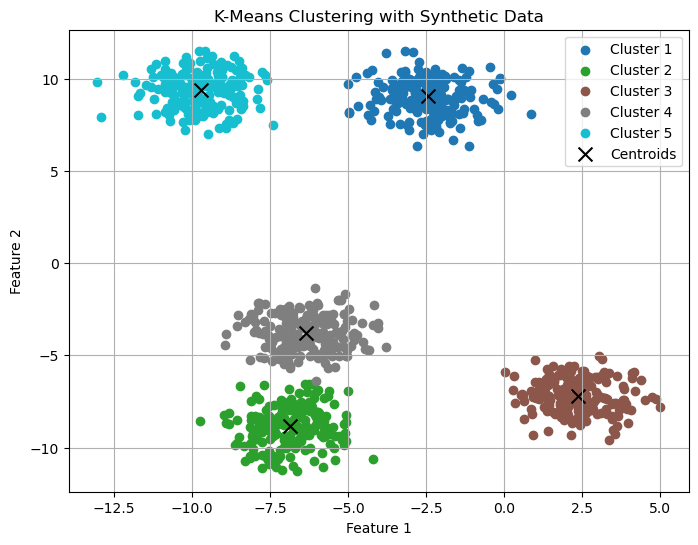

In [31]:
plot_clusters(data, assignments, centroids)

In [32]:
def plot_elbow(data, max_k=10):
    inertia = []

    for k in range(1, max_k + 1):
        clusters, assignments, centroids = k_means_clustering(data, k)
        total_distance = sum(euclidean_distance(point, centroids[assignment]) for point, assignment in zip(data, assignments))
        inertia.append(total_distance)

    # Plotting the elbow plot
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), inertia, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Sum of Squared Distances)')
    plt.xticks(range(1, max_k + 1))
    plt.grid()
    plt.show()

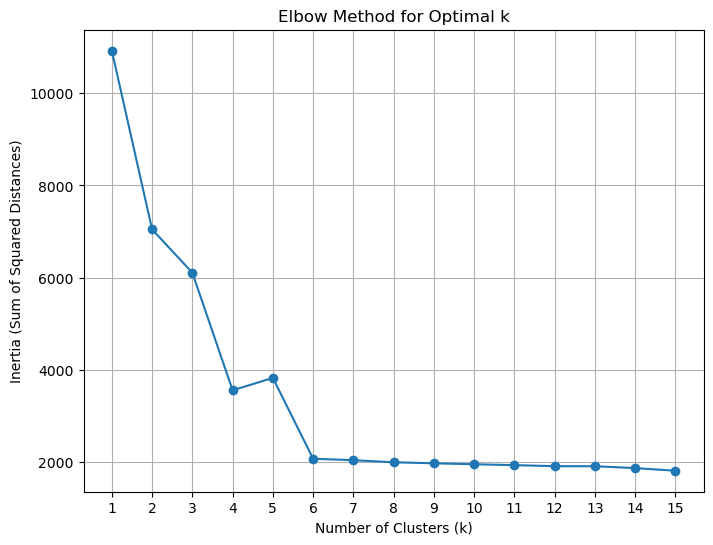

In [33]:
plot_elbow(data, max_k=15)